In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
shopeasy_df = pd.read_csv('shopEasy.csv')

# Drop the 'personId' column
shopeasy_df.drop('personId', axis=1, inplace=True)

# Display the dataset
shopeasy_df.head()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


In [52]:
missing_values = shopeasy_df.isnull().sum()

print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


In [53]:
# Fill the missing values in the 'maxSpendLimit' column
shopeasy_df['maxSpendLimit'].fillna(shopeasy_df['maxSpendLimit'].mean(), inplace=True)

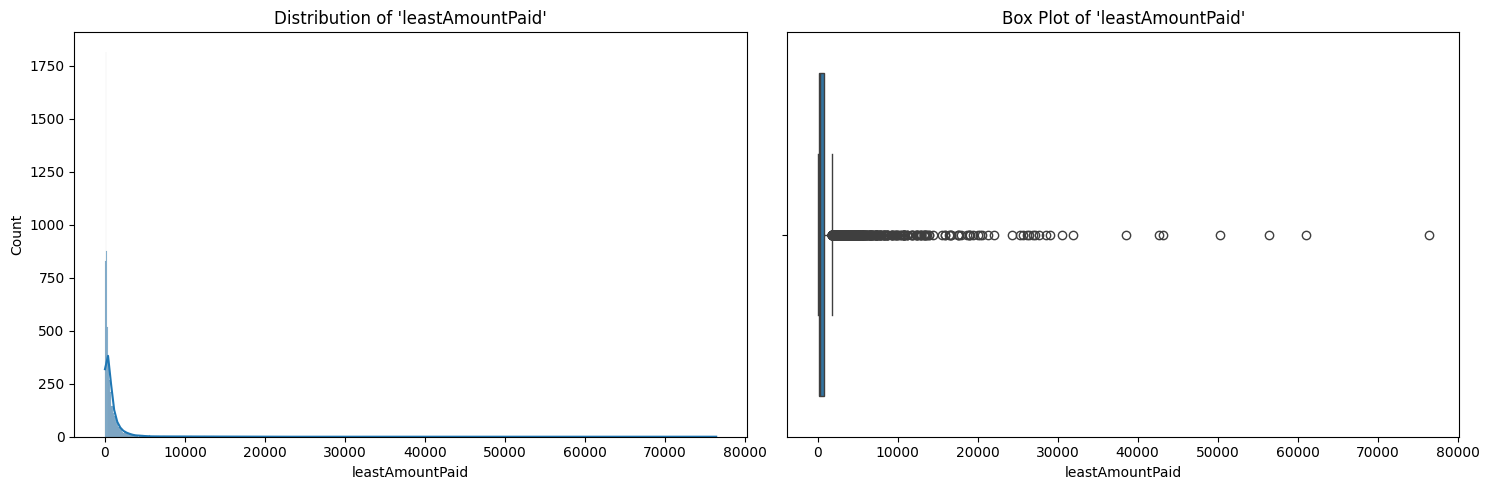

In [54]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Check the distribution of 'leastAmountPaid' to decide between mean and median for imputation
sns.histplot(shopeasy_df['leastAmountPaid'].dropna(), kde=True, ax=axs[0])
axs[0].set_title("Distribution of 'leastAmountPaid'")

# Check for outliers using a box plot
sns.boxplot(x=shopeasy_df['leastAmountPaid'], ax=axs[1])
axs[1].set_title("Box Plot of 'leastAmountPaid'")

plt.tight_layout()
plt.show()


In [55]:
# Fill the missing values in the 'leastAmountPaid' column

# Substitute with 0 when 'itemCount' is 0
shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0

# Substitute with 'singleItemCosts' when 'itemCount' is 1
shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['singleItemCosts']

# Substitute with the median for the rest
median_leastamountpaid = shopeasy_df['leastAmountPaid'].median()
shopeasy_df['leastAmountPaid'].fillna(median_leastamountpaid, inplace=True)


In [56]:
# Verify if there are any missing values after imputation
missing_values_after_imputation = shopeasy_df.isnull().sum()

print('Missing Values After Imputation Summary:')
print(missing_values_after_imputation)

Missing Values After Imputation Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


# Univariate Analysis

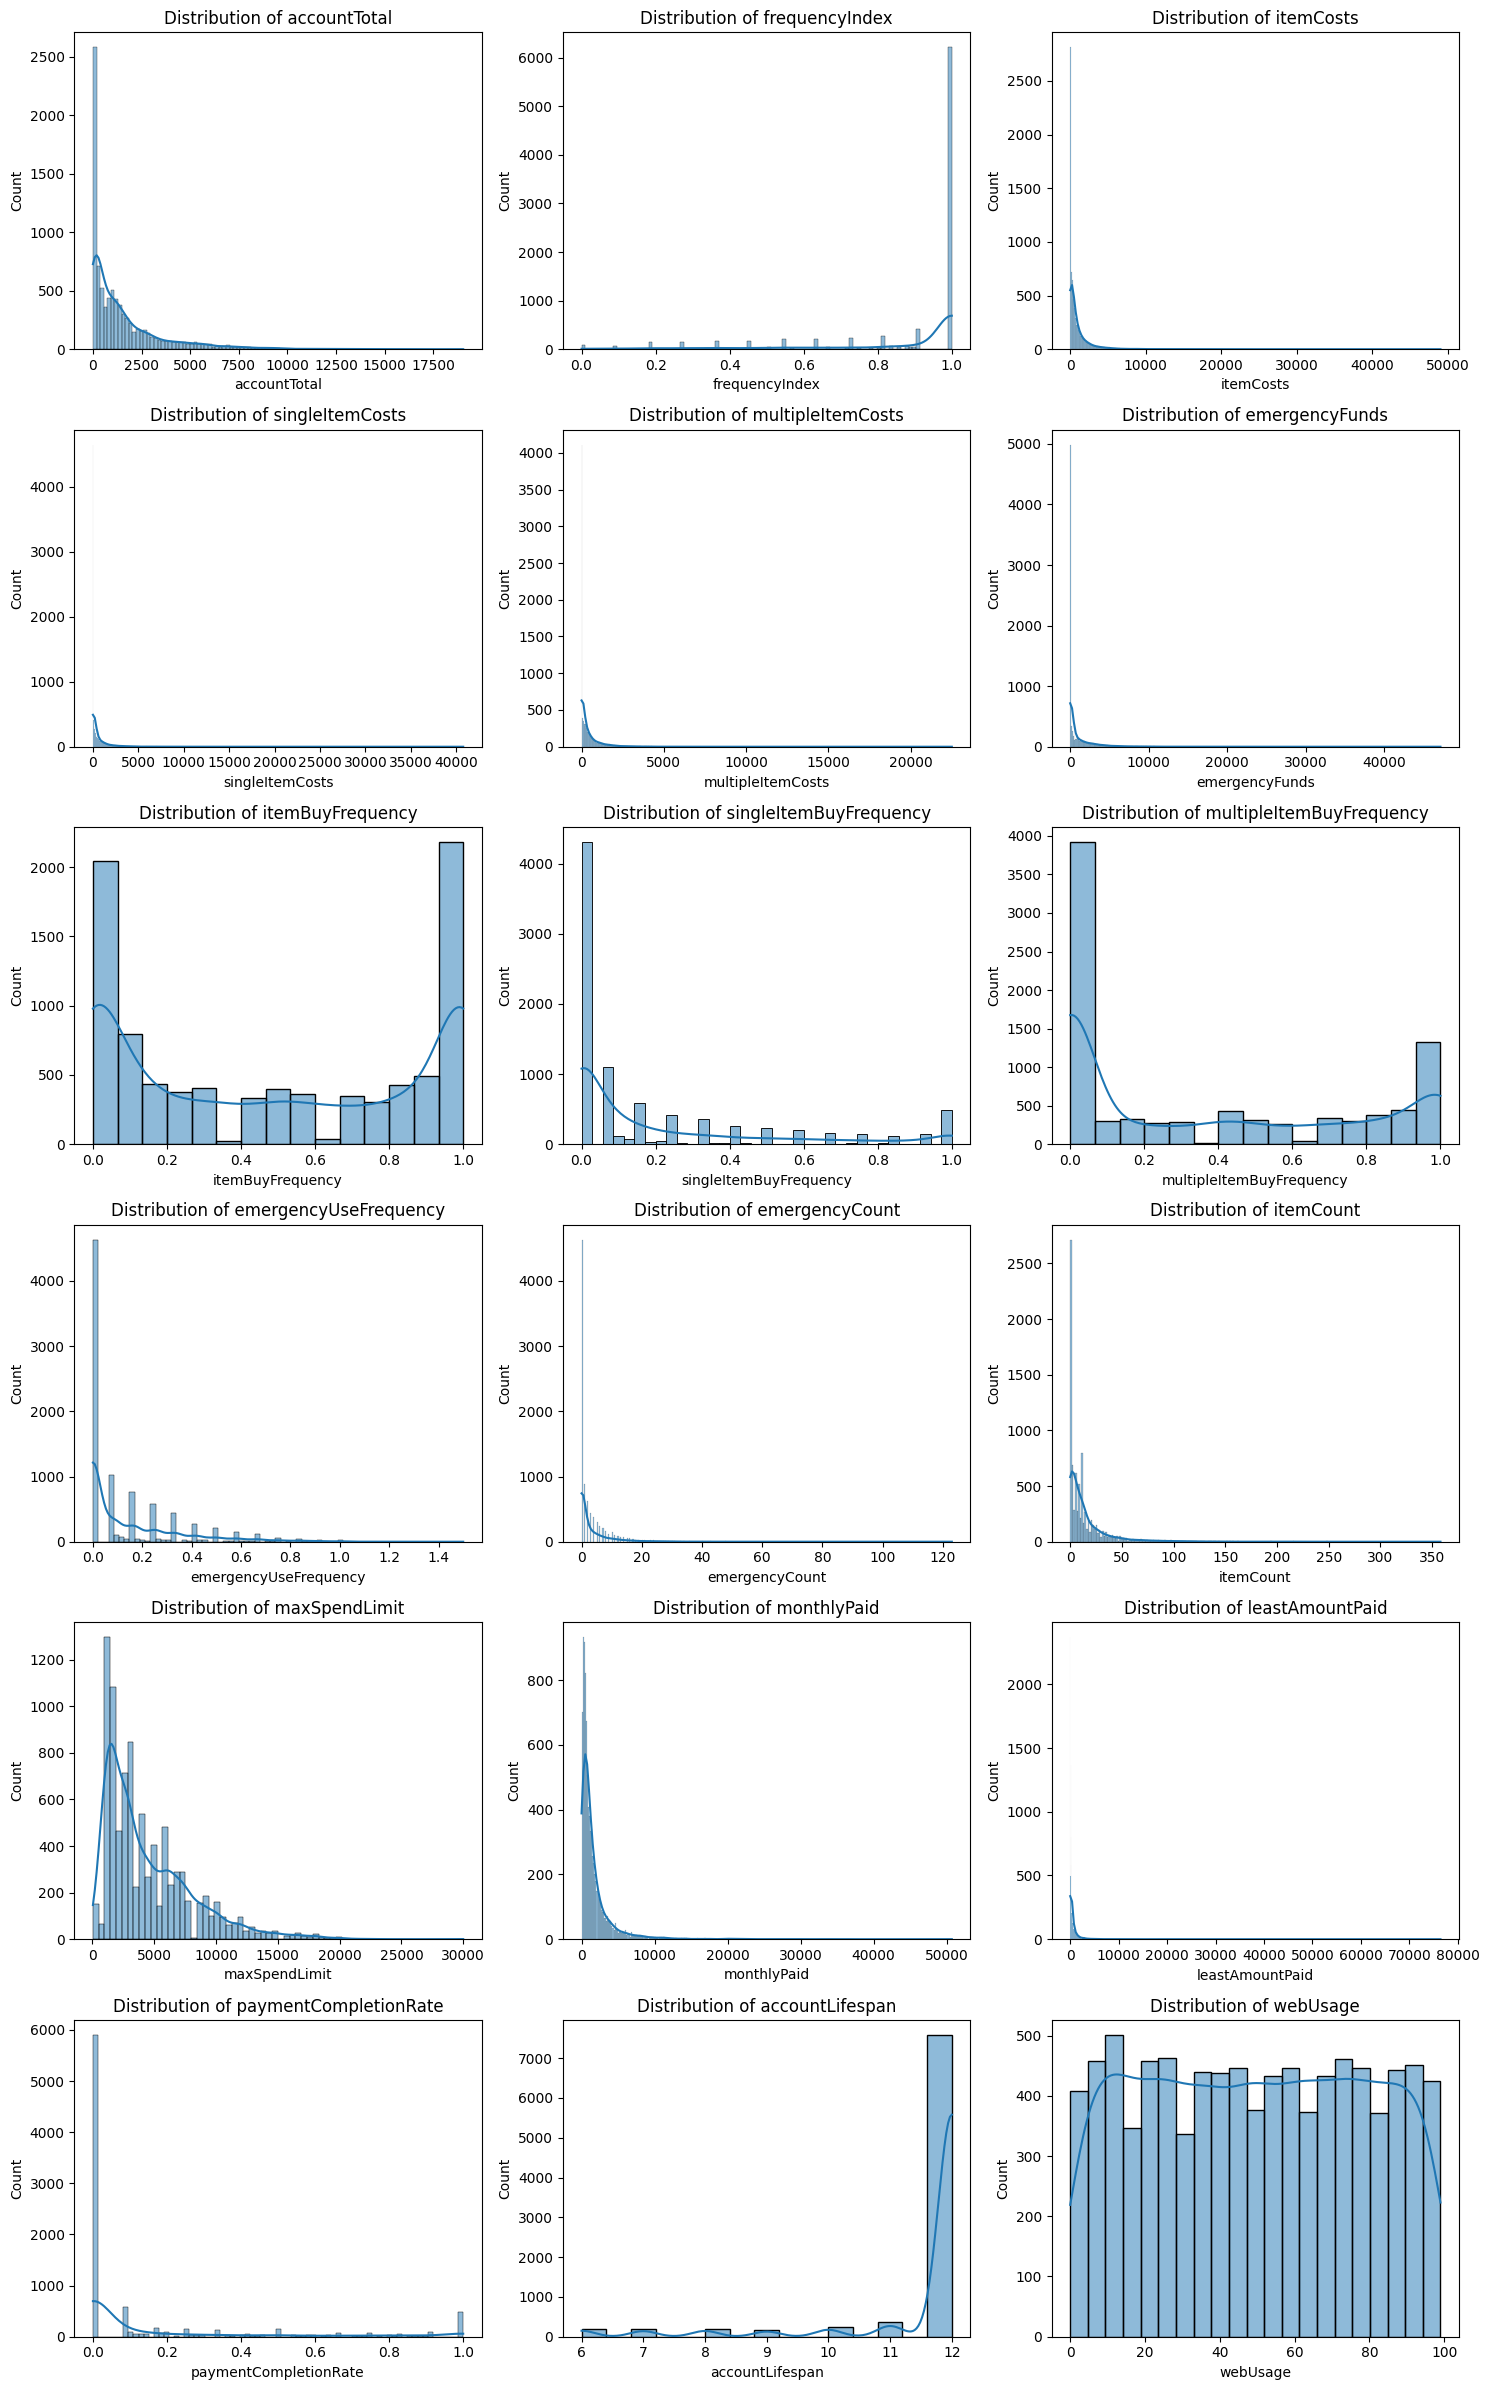

In [57]:
# Selecting numerical features
numerical_features = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows/columns for the subplot grid
num_features = len(numerical_features)
ncols = 3
nrows = num_features // ncols + (num_features % ncols > 0)

# Creating subplots
plt.figure(figsize=(15, nrows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

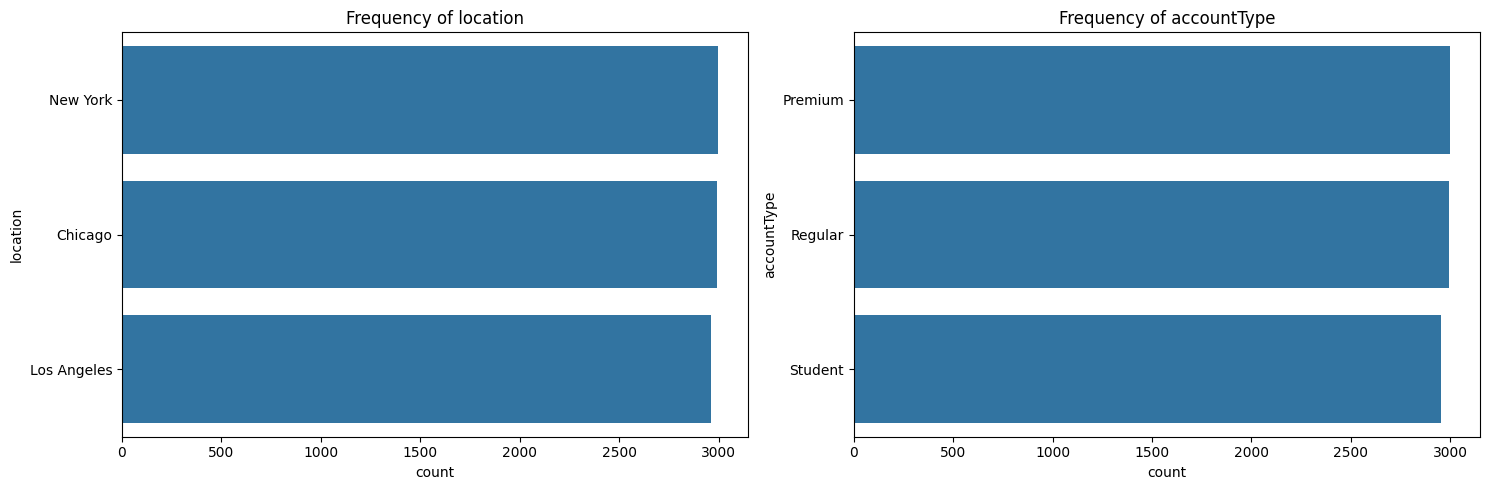

In [58]:
categorical_features = ['location', 'accountType']  # Specify the categorical features you want to plot

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Creating subplots for the selected categorical variables
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=shopeasy_df, order=shopeasy_df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


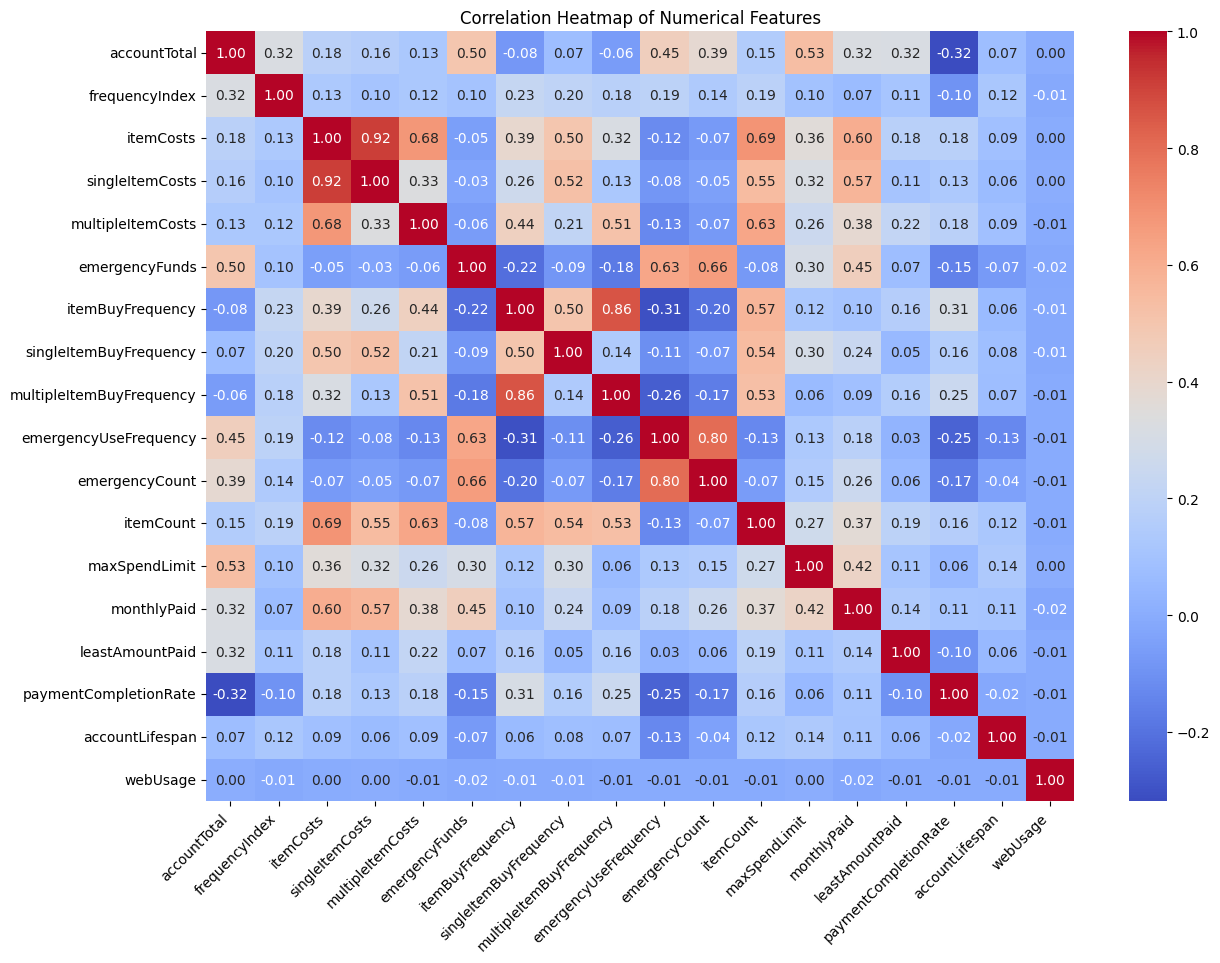

In [59]:
numerical_df = shopeasy_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Analyzing High Correlations

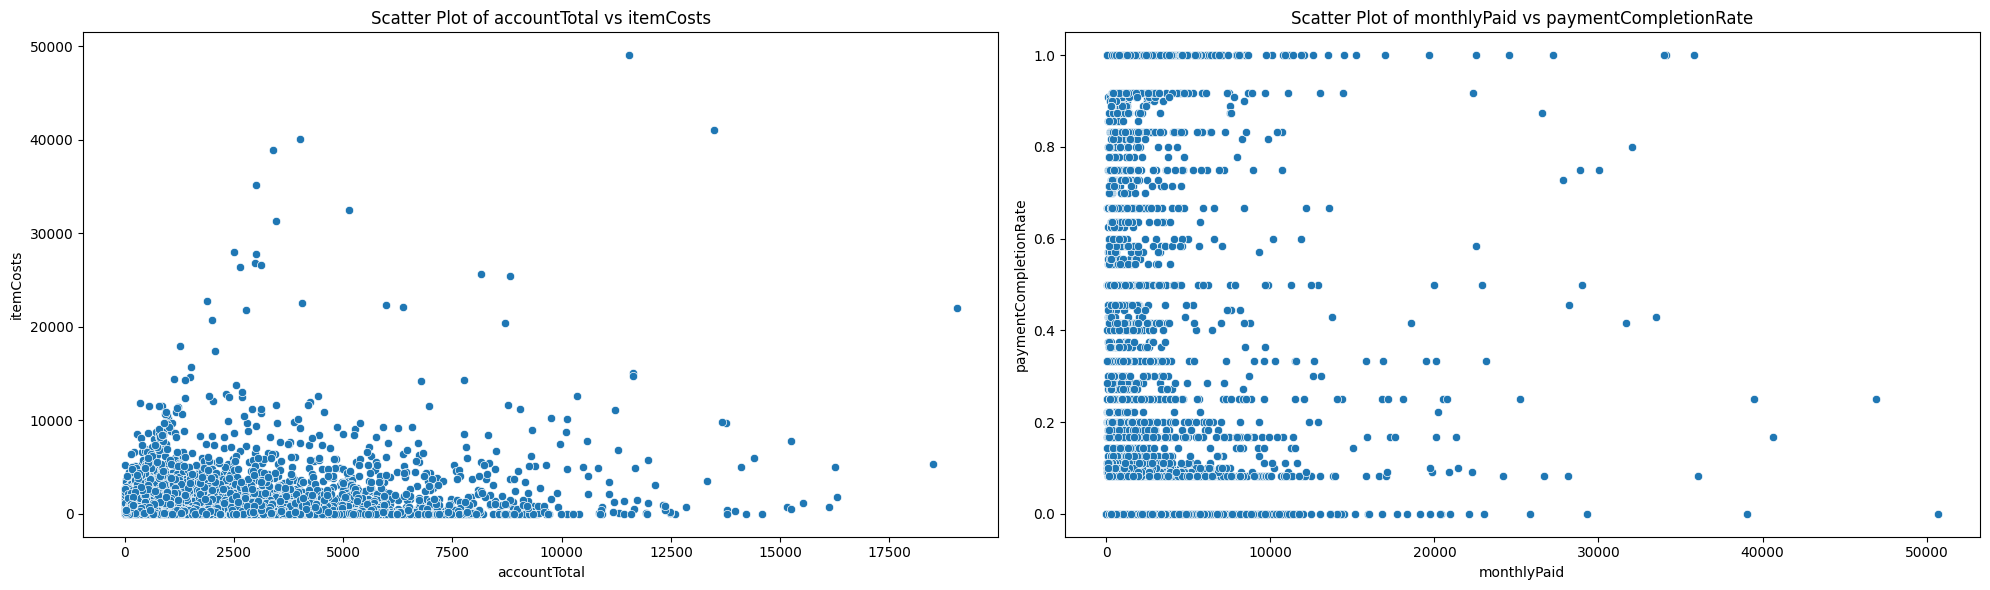

In [60]:
# Sample pairs of features with high correlations
high_corr_pairs = [('accountTotal', 'itemCosts'), ('monthlyPaid', 'paymentCompletionRate')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(high_corr_pairs)
ncols = 2
nrows = num_pairs // ncols + (num_pairs % ncols > 0)  # Calculate the number of rows

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(high_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

Observation: There's a positive correlation between these two variables, as expected. Customers who have a higher total spend on ShopEasy tend to also have higher individual item costs.
Reasoning: This correlation is logical because customers who make more expensive purchases will naturally contribute more to their total spending over time.
EDA Action: We could segment users based on their spending patterns to identify high-value customers or analyze the types of items that contribute most to higher spending.

Observation: There's a wide distribution of monthly payments, but the payment completion rate is often 0 or 1, indicating that many users either pay off their purchases in full or not at all in any given month.
Reasoning: This might suggest that some users prefer to pay in installments, while others pay in full, which could be indicative of different financial behaviors or preferences.
EDA Action: Investigate the characteristics of users who have high monthly payments with different completion rates to understand if there are distinct financial behavior patterns.

# Surprising Correlations

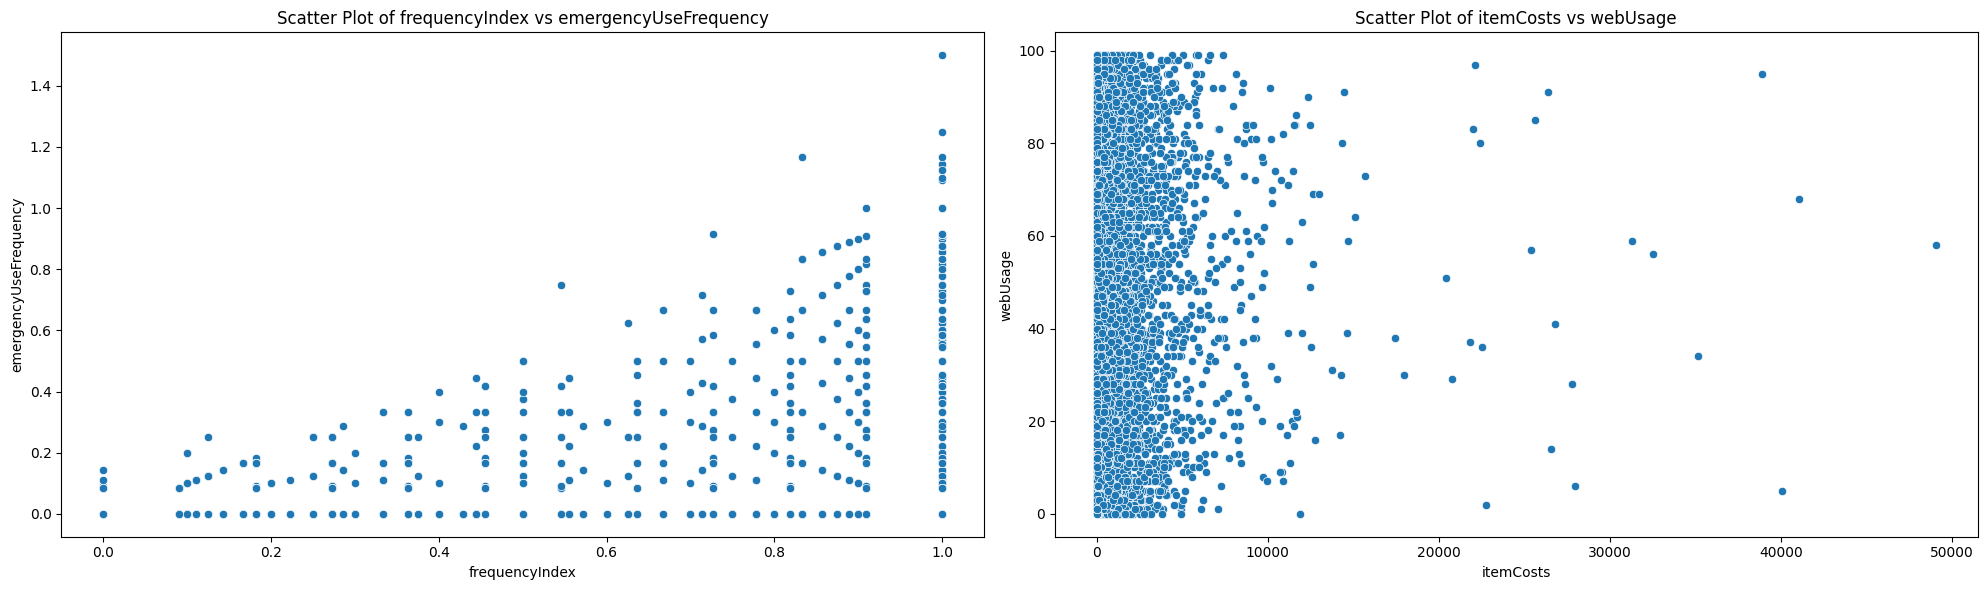

In [61]:
# Sample pairs of features with surprising correlations
surprising_corr_pairs = [('frequencyIndex', 'emergencyUseFrequency'), ('itemCosts', 'webUsage')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(surprising_corr_pairs)
ncols = 2 

# Determine the number of rows/columns for the subplot grid
nrows = num_pairs // ncols + (num_pairs % ncols > 0)

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))
axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(surprising_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

Observation: The scatter plot doesn't show a strong linear relationship, which is surprising given that one might expect frequent shoppers to use emergency funds more often.
Reasoning: This could indicate that emergency funds are not directly related to shopping frequency but to other factors like financial planning or unexpected needs.
EDA Action: Further investigate the usage of emergency funds in the context of customer demographics or other behavioral indicators to understand what drives the use of these funds.

Observation: There doesn't appear to be a strong relationship between the cost of items purchased and web usage. This suggests that frequent web users are not necessarily spending more per item.
Reasoning: This might imply that web usage is a separate behavioral trait and doesn't influence the type or cost of items purchased.
EDA Action: Explore if different channels (web vs mobile, for instance) attract different types of customers or if web usage correlates with other behaviors such as the type of products purchased or shopping times.

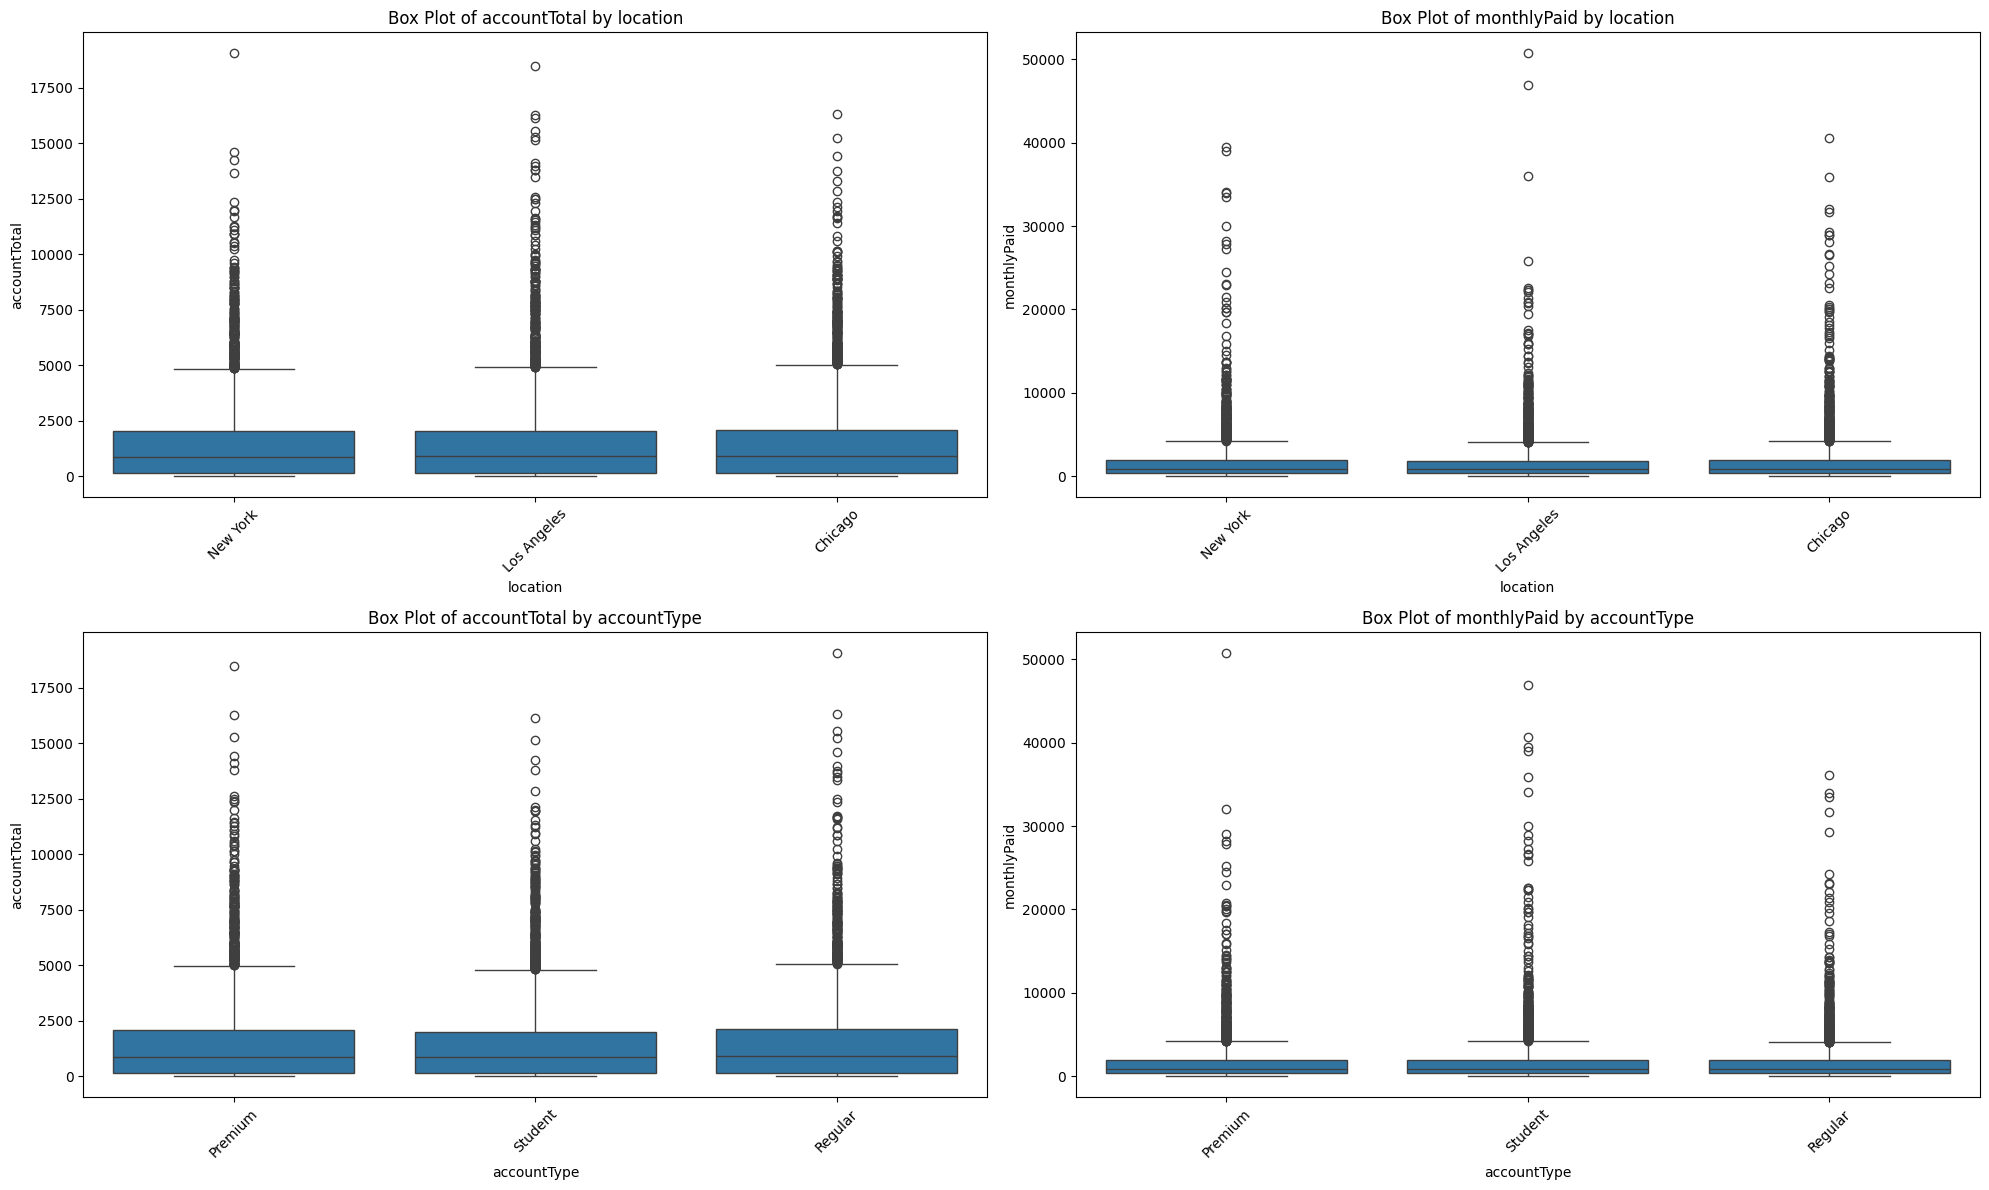

In [62]:
from itertools import product
# Features to explore against categorical variables
numerical_features = ['accountTotal', 'monthlyPaid']
categorical_features = ['location', 'accountType']

num_plots = len(numerical_features) * len(categorical_features)
ncols = 2
nrows = num_plots // ncols + (num_plots % ncols > 0)

# Creating subplots for box plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

for i, (cat_feature, num_feature) in enumerate(product(categorical_features, numerical_features)):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=cat_feature, y=num_feature, data=shopeasy_df, ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {num_feature} by {cat_feature}')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


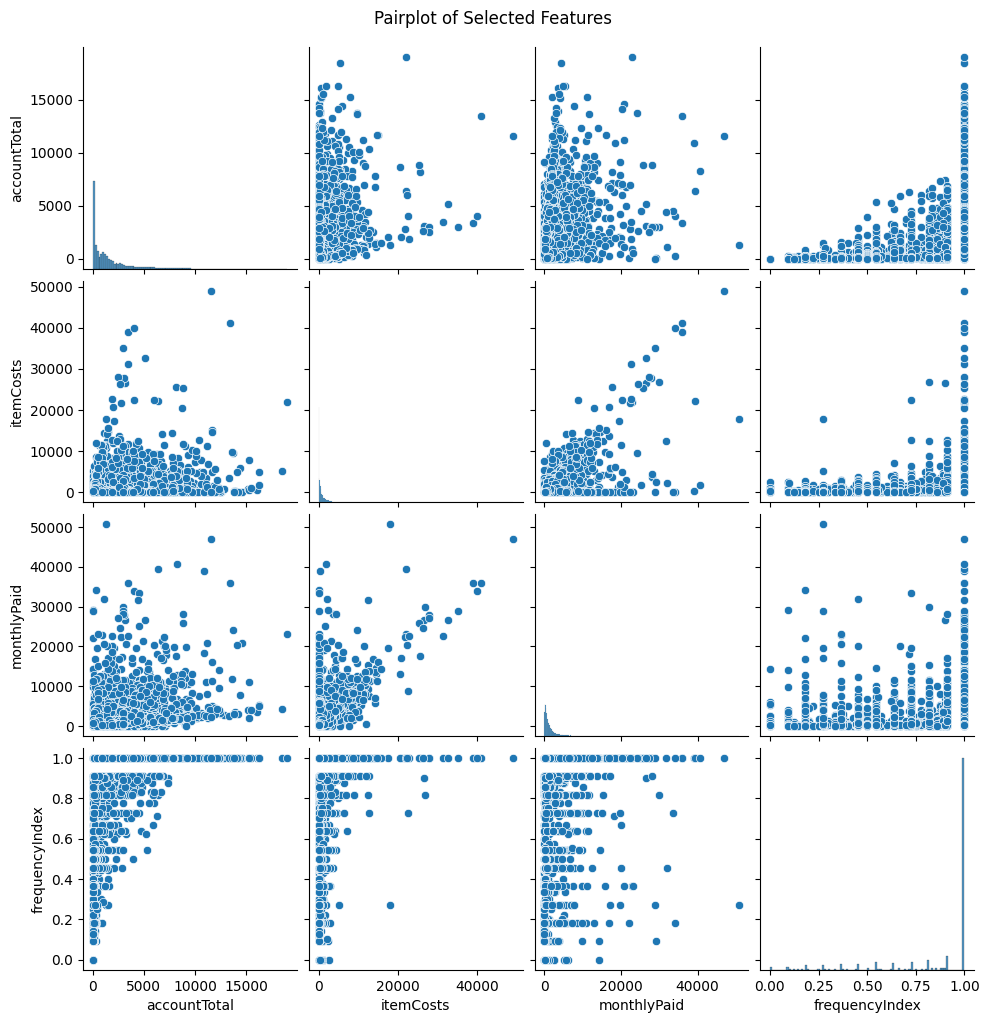

In [63]:
# Selected features for pairplots
selected_features_for_pairplot = ['accountTotal', 'itemCosts', 'monthlyPaid', 'frequencyIndex']

# Create pairplots
sns.pairplot(shopeasy_df[selected_features_for_pairplot])
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust y for the title to display correctly
plt.show()


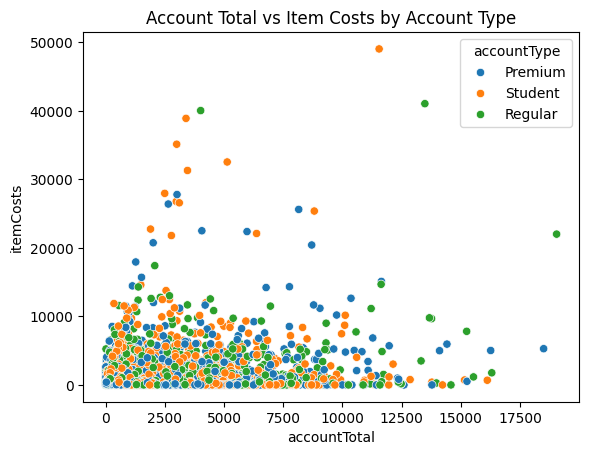

In [64]:
# Explore relationships between variables
sns.scatterplot(x='accountTotal', y='itemCosts', hue='accountType', data=shopeasy_df)
plt.title('Account Total vs Item Costs by Account Type')
plt.show()


In [65]:
# One-hot encoding for 'location'
shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])

from sklearn.preprocessing import LabelEncoder

# Label encoding for 'accountType'
le = LabelEncoder()
shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])

# Drop the original 'accountType' column
shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)

# Display the encoded dataset
shopeasy_df_encoded.head()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_encoded
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,...,1500.0,236.764555,207.007715,0.00,6,60,False,False,True,0
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,...,2000.0,89.741508,0.000000,0.00,6,5,False,True,False,0
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,...,2500.0,234.271939,334.730000,0.25,12,21,False,False,True,2
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,...,5000.0,0.000000,0.000000,0.00,12,53,True,False,False,0
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1500.0,118.438703,57.000000,0.00,6,59,False,False,True,0


In [66]:
from sklearn.preprocessing import StandardScaler

# Selecting columns to scale (excluding one-hot encoded and label encoded columns)
columns_to_scale = [col for col in shopeasy_df.columns if (col != 'location' and col != 'accountType')]

# Initializing StandardScaler
scaler = StandardScaler()

# Creating a new DataFrame for the scaled version
shopeasy_df_scaled = shopeasy_df_encoded.copy()
shopeasy_df_scaled[columns_to_scale] = scaler.fit_transform(shopeasy_df_encoded[columns_to_scale])

# Displaying the first few rows of the scaled and encoded dataframe
shopeasy_df_scaled.head()


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_encoded
0,-0.254545,-0.185477,0.142711,0.431181,-0.454576,-0.354913,0.024043,0.997395,-0.916995,0.157527,...,-0.823011,-0.516902,-0.194497,-0.525551,-4.122768,0.367188,False,False,True,0
1,-0.377926,-0.889033,-0.469552,-0.356934,-0.454576,0.401170,-1.221758,-0.678661,-0.916995,1.823274,...,-0.685588,-0.567688,-0.300354,-0.525551,-4.122768,-1.542096,False,True,False,0
2,-0.704819,-0.249434,-0.312881,-0.155265,-0.454576,-0.457462,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.548165,-0.517763,-0.129185,0.329200,0.360680,-0.986668,False,False,True,2
3,-0.751640,-3.703271,-0.463631,-0.356934,-0.440587,-0.466786,-1.014125,-0.678661,-0.707313,-0.675349,...,0.138948,-0.598688,-0.300354,-0.525551,0.360680,0.124188,True,False,False,0
4,-0.742934,-1.592594,-0.442873,-0.322592,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,...,-0.823011,-0.557775,-0.271206,-0.525551,-4.122768,0.332473,False,False,True,0
